# SHM modelo predição de dano explicado pelo SHAP

In [1]:
import pandas as pd
import numpy as np
import shap
import os
import matplotlib.pyplot as plt

## Leitura da base de dados

In [2]:
diretorio = 'Pasta de Dados/Validos/'
quantidadeamostras = 20
quantidadeniveis = 3
quantidadetemperaturas = 7
quantidadepzt = 3

direc = os.listdir(diretorio)

direc


['PZT3', 'PZT6', 'PZT7']

PZT3_T1
PZT3_T2
PZT3_T3
PZT3_T4
PZT3_T5
PZT3_T6
PZT3_T7
PZT6_T1
PZT6_T2
PZT6_T3
PZT6_T4
PZT6_T5
PZT6_T6
PZT6_T7
PZT7_T1
PZT7_T2
PZT7_T3
PZT7_T4
PZT7_T5
PZT7_T6
PZT7_T7


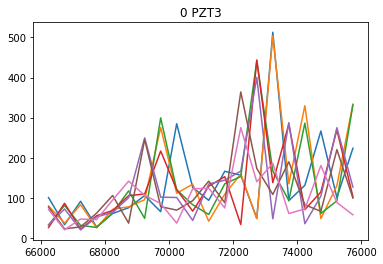

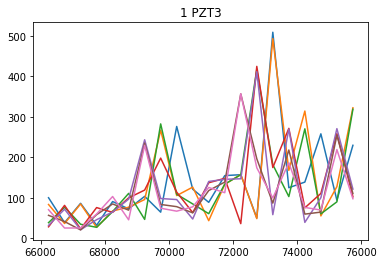

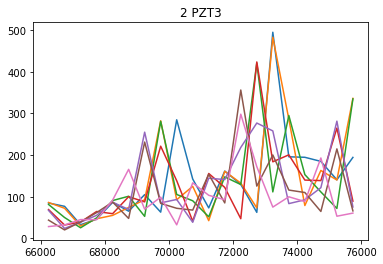

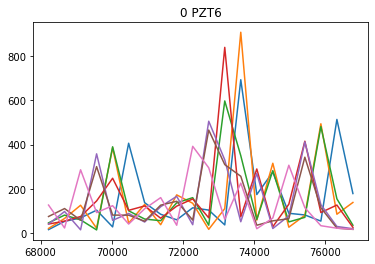

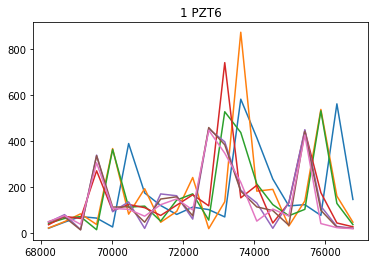

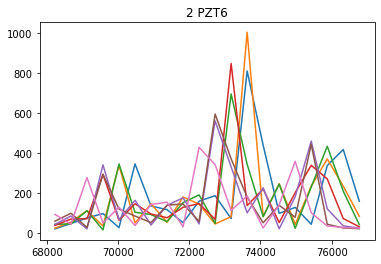

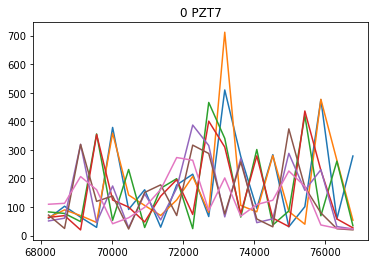

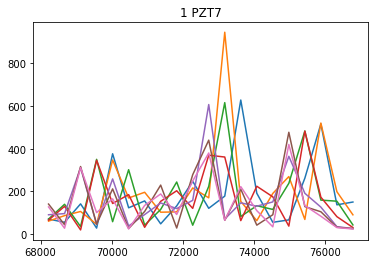

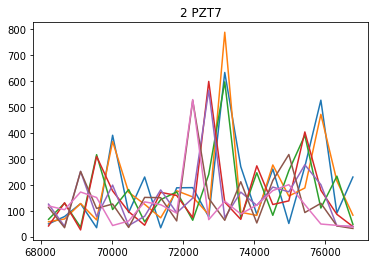

In [3]:
temperaturas = {1:-10, 2:0, 3:10, 4:20, 5:30, 6:40, 7:50}
values = pd.qcut(np.arange(2000),20, labels=np.arange(20).tolist())
mapping = dict(list(enumerate(values)))
k=0
for i in direc:
    for niv in range(quantidadeniveis):
        plt.figure(niv+k)
    for j in range(1,quantidadetemperaturas+1):
        #print(diretorio+'/'+i+'/'+i+'T'+str(j)+'.csv')
        locals()[i+'_T'+str(j)] = pd.read_csv(diretorio+'/'+i+'/'+i+'T'+str(j)+'.csv',header=None,delimiter=' ').T
        locals()[i+'_T'+str(j)] = eval(i+'_T'+str(j)).groupby(mapping, axis = 1).mean()#.agg('mean','std'])
        print(i+'_T'+str(j))
        for niv in range(quantidadeniveis):
            plt.figure(niv+k)
            plt.plot(eval(i+'_T'+str(j)).loc[0,:],eval(i+'_T'+str(j)).loc[1+quantidadeamostras*niv:quantidadeamostras+1+quantidadeamostras*niv,:].mean())
            plt.title(str(niv)+' '+i)
        #eval(i+'_T'+str(j)).loc[:,'temp'] = temperaturas[j]
    k=k+quantidadeniveis

In [4]:

eval(i+'_T'+str(j)).columns
# PZT3_T1

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [5]:
print(PZT3_T1.columns)
print(PZT3_T1.shape)
PZT3_T1.loc[0:20,:]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
(101, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,66247.623810,66747.873930,67248.124070,67748.374190,68248.624310,68748.874430,69249.124570,69749.374690,70249.624810,70749.874930,71250.125070,71750.375190,72250.625310,72750.875430,73251.125570,73751.375690,74251.625810,74751.875930,75252.126070,75752.376190
1,101.841209,31.790798,93.265359,27.129017,56.880668,76.068643,107.428195,66.697660,285.431286,125.282027,94.824962,161.290928,157.670624,47.453799,515.995983,90.314222,132.233830,267.091940,103.337998,222.941344
2,100.623437,30.759384,92.162444,26.160088,59.069987,74.768688,105.593037,65.304109,285.233031,124.692398,93.786888,161.634462,157.028724,46.897964,514.499413,87.746783,131.113040,266.567639,102.264978,222.305584
3,100.603601,30.699528,91.965113,26.071307,53.375475,74.982866,106.048696,65.437755,285.048233,124.870494,93.748877,156.235945,157.026115,46.895293,514.062498,90.560698,131.670233,265.586438,102.726709,221.814753
4,100.590968,30.820915,91.857824,26.182159,53.715269,74.970530,105.879403,65.487254,284.421009,124.745517,93.862486,157.900493,156.982064,47.031443,512.941716,90.762485,131.528881,265.497332,102.398002,222.159399
5,100.617399,30.956841,91.861277,26.314228,55.018899,74.941380,105.558074,65.425767,284.273407,124.786166,93.914512,159.281473,157.278154,47.109154,513.146472,89.478054,131.300531,265.473044,101.741785,222.679677
6,100.579659,31.007236,91.845381,26.389529,57.801183,74.928542,105.165417,65.300485,284.336773,124.752133,93.953860,162.623396,157.231123,47.189323,513.346788,87.720122,130.662592,265.614644,101.140301,222.526847
7,100.606238,30.924373,91.867247,26.300021,56.216702,75.032485,105.159833,65.371518,283.922219,124.787117,93.929221,162.231780,156.960557,47.278828,512.749997,87.978383,131.032888,265.376190,100.982929,222.719737
8,100.639635,31.112649,91.952352,26.450468,66.408594,74.900530,104.871968,65.165206,284.287914,125.057659,94.151923,168.957642,157.120416,47.339497,513.421713,87.363160,130.587744,265.761811,100.139375,223.893883
9,100.719873,31.108992,92.006088,26.473327,59.562284,75.150341,104.976724,65.223540,284.443964,124.982022,94.142040,167.767491,157.118161,47.380931,513.764777,89.234759,130.626976,266.013891,100.399296,224.085768


### Construindo os dados de treino e validação

In [6]:
quantidadeamostras+quantidadeamostras*1


40

In [7]:
for i in ['PZT3_T1','PZT3_T2','PZT3_T3','PZT6_T1','PZT6_T2','PZT6_T3','PZT7_T1','PZT7_T2','PZT7_T3']:
    #eval(i).loc[0, 'target'] = 11111
    for niv in range(quantidadeniveis):
        eval(i).loc[1+quantidadeamostras*niv:quantidadeamostras+1+quantidadeamostras*niv, 'target'] = int(niv)
    eval(i).dropna(inplace=True)
eval(i).describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,72.985827,114.574919,39.873354,339.500538,71.708906,237.868674,41.763625,141.165226,204.642803,42.502749,...,513.836109,72.399927,227.589361,77.104068,190.779603,430.987223,111.968791,216.482924,41.183722,1.016393
std,7.396736,28.889615,6.734570,32.409303,25.026368,53.042226,12.931469,22.406561,32.448901,17.314657,...,133.527916,7.786188,76.485022,35.178601,82.193816,51.321443,39.521953,49.653082,5.726566,0.826475
min,58.853511,72.708898,33.656932,237.100651,50.880565,170.920227,27.395959,111.333762,151.267928,23.303949,...,312.554591,63.877862,111.476016,32.107418,77.051465,362.902042,64.164182,145.380751,33.889699,0.000000
25%,67.621379,76.020197,34.677288,347.333702,53.957044,184.006545,27.502198,113.879537,183.209439,23.432290,...,329.483539,64.029066,136.758798,32.294128,79.944432,387.993323,65.001940,152.418020,34.044059,0.000000
50%,69.004369,128.156283,36.104033,348.933422,56.118273,230.290286,39.912958,142.252189,197.067320,39.828253,...,596.111676,71.220173,244.887486,83.895014,235.841968,417.985596,110.179450,236.448108,41.907124,1.000000
75%,81.376122,137.905012,49.290303,355.838918,105.089538,305.914800,54.360065,167.774173,241.579881,59.466138,...,612.631936,77.938421,309.456347,109.174534,256.491087,487.461006,160.653310,265.847054,47.684886,2.000000
max,85.138238,150.353543,49.435515,384.008719,111.323774,311.197318,63.125781,168.107343,252.745946,71.010081,...,637.718697,87.355404,310.909137,131.838150,269.606990,617.700701,162.959975,266.609036,48.349518,2.000000


### separando os dados de treino e validação


In [8]:
sinais = pd.concat([PZT3_T1,PZT3_T2, PZT3_T3])
sinais =sinais.sample(frac=1).reset_index(drop=True)
features = sinais.drop(columns=['target'])
y = sinais['target']
y.value_counts()

2.0    63
0.0    60
1.0    60
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((91, 20), (92, 20), (91,), (92,))

In [10]:
yval.value_counts()

0.0    33
1.0    33
2.0    26
Name: target, dtype: int64

In [11]:
Xtrain.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='object')

## Criando o modelo


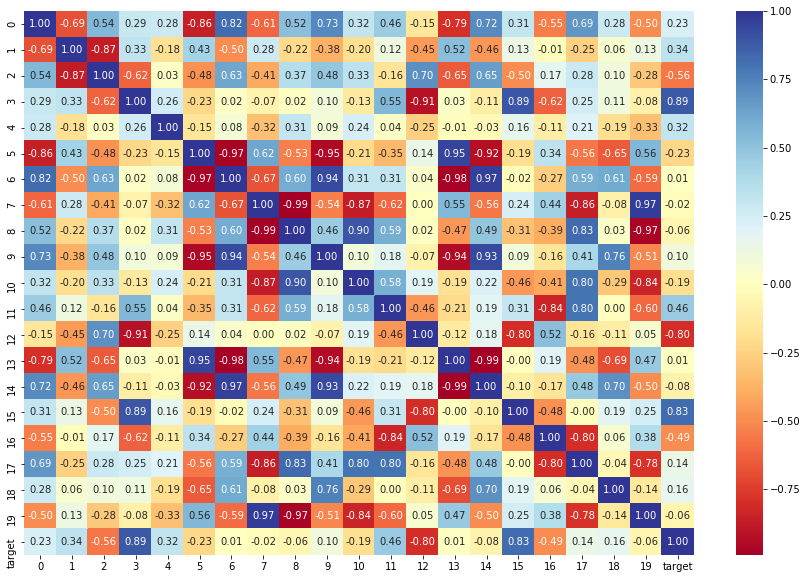

In [12]:
import seaborn as sns
corr = sinais.corr()
# plot the heatmap
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, fmt=".2f", ax=ax, cmap='RdYlBu')

In [13]:
mu, sigma = Xval.mean().mean(), Xval.std().std() 
# creating a noise 

indices = np.random.randint(len(Xval), size=np.int(len(Xval)/3))
Xtest= Xval
for i in indices:
    noise = np.random.normal(mu, sigma, [1,len(Xval.columns)]) 
    Xtest.iloc[i] = Xtest.iloc[i]+noise[0]

In [21]:
from sklearn.ensemble import RandomForestClassifier
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [22]:
from sklearn.metrics import classification_report
p = mdl.predict(Xval)
print(classification_report(yval, p))

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       1.00      0.73      0.84        33
         2.0       0.58      1.00      0.73        26

    accuracy                           0.79        92
   macro avg       0.86      0.81      0.80        92
weighted avg       0.88      0.79      0.80        92



In [23]:
# VERIFICANDO COM O DATASET RUIDOSO
p = mdl.predict(Xtest)
print(classification_report(yval, p))

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82        33
         1.0       1.00      0.73      0.84        33
         2.0       0.58      1.00      0.73        26

    accuracy                           0.79        92
   macro avg       0.86      0.81      0.80        92
weighted avg       0.88      0.79      0.80        92



### Precision:
    Todo mundo que era da classe 1 quantos % foi previstos sendo da classe 1
### recall:
    Todos os exemplos da classe 1 quantos % foram detectados
### f1-score
    Média armonica entre precision e recall
    

In [24]:
import shap

# load JS visualization code to notebook
shap.initjs()

### Criando o explainer que é um objeto que representa o modelo
### E o shap_values que é uma lista com 2 arrays para cada exemplo treinado, e apresenta a probabilidade de ser da classe 1 para o primeiro array e probabilidade de ser da classe 2 para o array 2 

In [25]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain)
shap_values[1].shape

(91, 20)

### Expected_values são as previsoes médias feitas pelo explainer para cada dado treinado

In [26]:
Xtrain.iloc[0]

0     102.693975
1      33.577691
2      94.744083
3      29.780326
4     104.614002
5      73.984417
6     104.341342
7      64.481792
8     276.340459
9     121.275813
10     89.884971
11    148.968892
12    158.350041
13     47.587643
14    510.488506
15    114.457680
16    133.907981
17    262.035139
18     92.954196
19    230.110840
Name: 53, dtype: float64

In [28]:
ytrain.values


array([1., 2., 2., 1., 2., 0., 1., 2., 2., 2., 0., 0., 2., 2., 1., 0., 1.,
       0., 1., 1., 2., 2., 2., 2., 2., 2., 0., 1., 0., 1., 2., 2., 0., 2.,
       1., 1., 2., 2., 1., 2., 2., 1., 0., 1., 2., 2., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 2., 0., 2., 0., 2., 1., 0., 0., 2., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 2., 2., 0., 2., 2., 0., 2., 0., 0., 0., 2.,
       2., 2., 2., 2., 0., 0.])

In [29]:
mdl.predict(Xval)

array([2., 2., 2., 2., 2., 2., 0., 1., 1., 2., 1., 2., 2., 1., 0., 0., 2.,
       0., 2., 1., 0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 2., 1., 1., 1.,
       1., 1., 2., 2., 2., 1., 0., 1., 1., 2., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 2., 2., 0., 2., 2., 0., 2., 1., 2., 0., 0., 0., 1., 1., 2.,
       2., 0., 1., 2., 0., 2., 2., 0., 2., 1., 1., 2., 1., 1., 1., 2., 0.,
       2., 2., 0., 2., 1., 2., 1.])

In [30]:
explainer.expected_value

array([0.29514286, 0.29767033, 0.40718681])

### Classe 2 - dano 2 para a instancia 0
    Probabilidade de pertencer a classe de dano 2

In [31]:
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], Xtrain.iloc[0,:])

### Classe 1 - dano 1 para a instancia 0
    Probabilidade de pertencer a classe de dano 1

In [32]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:])

### Classe 0 - baseline para a instancia 0
    Probabilidade de pertencer a classe de baseline

In [33]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], Xtrain.iloc[0,:])

In [34]:
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain)

## Features mais importantes do modelo
#### Cor: vermelho: maior que amédia
#### Cor: azul: menor que a média
Eixo x é o impacto na previsão (empurrando pra cima + ou para baixo -)

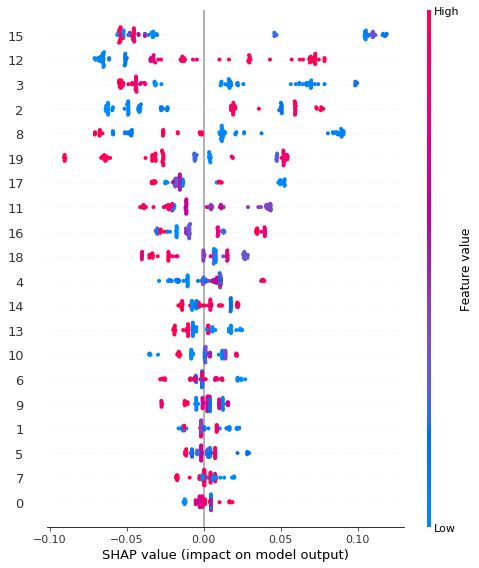

In [35]:
shap.summary_plot(shap_values[1], Xtrain)

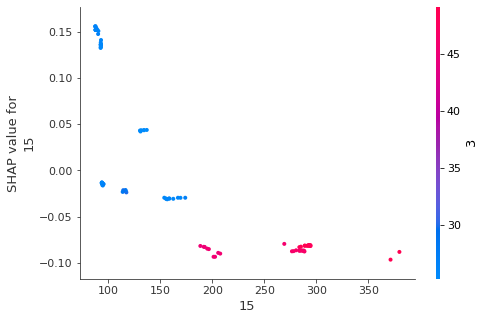

In [36]:
shap.dependence_plot(15, shap_values[0], Xtrain, interaction_index=3)